#LIBRARY DECLARATION

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics


#READING DATA_SET

In [0]:
data=pd.read_csv('CompleteDataset.csv')
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Index,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#DATA DESCRIPTION

In [0]:
data.describe()

,Index,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,8990.000000,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,207658.710138,59.251755,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,59.251755,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,5190.811931,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,32291.667313,9.880164,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.880164,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,0.000000,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,16.000000,27.000000,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,27.000000,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,4495.000000,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,192622.000000,53.000000,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,53.000000,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,8990.000000,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,214057.000000,60.000000,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,60.000000,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,13485.000000,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,231448.000000,66.000000,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,66.000000,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,17980.000000,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,241219.000000,92.000000,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


#PRE-Processing

#DATA ENCODING

In [0]:
data =data.drop([ 'Photo', 'Flag', 'Club Logo'], axis = 1)
PP = data['Preferred Positions']
data = data.drop('Preferred Positions', axis = 1)
data['Preferred Positions'] = PP

In [0]:
l = []
for i in data['Value']:
    l.append(i[1: len(i) - 1])
data['Value'] = l
l = []
for i in data['Wage']:
    if(len(i) > 2):
        l.append(int(i[1: len(i) - 1]))
    else:
        l.append(0)
data['Wage'] = l

#CHECKING NULL VALUES

In [0]:
data.isna().sum()

Index                     0
Name                      0
Age                       0
Nationality               0
Overall                   0
Potential                 0
Club                    248
Value                     0
Wage                      0
Special                   0
Acceleration              0
Aggression                0
Agility                   0
Balance                   0
Ball control              0
Composure                 0
Crossing                  0
Curve                     0
Dribbling                 0
Finishing                 0
Free kick accuracy        0
GK diving                 0
GK handling               0
GK kicking                0
GK positioning            0
GK reflexes               0
Heading accuracy          0
Interceptions             0
Jumping                   0
Long passing              0
                       ... 
Vision                    0
Volleys                   0
CAM                    2029
CB                     2029
CDM                 

#FILLING NULL VALUES

In [0]:
data['Club'] = data['Club'].fillna('U')



In [0]:
data.fillna('0',inplace=True)

In [0]:
def fix(x):
    x = str(x)
    if('+' in x):
        a, b = x.split("+")
        return int(a)
    elif('-' in x):
        a, b = x.split('-')
        return int(a)
    elif x.isdigit():
        return int(x)
    else:
        return float(x)
for column in data.iloc[:,9:71]:
    data[column] = data[column].apply(fix)

#BUCKETING

In [0]:
data['GK'] = (data['GK diving'] + data['GK handling'] + data['GK kicking'] +  data['GK positioning'] + data['GK reflexes'])
data = data.drop(['GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes'], axis = 1)

In [0]:
data['Defending'] =  (data['Marking'] + data['Sliding tackle'] + data['Standing tackle'])
data = data.drop(['Marking', 'Sliding tackle', 'Standing tackle'], axis = 1)

In [0]:
data['Attacking'] = (data['Crossing']  + data['Finishing'] + data['Heading accuracy'] + data['Short passing'] + data['Volleys'])
data = data.drop(['Crossing','Finishing','Heading accuracy','Short passing','Volleys'],axis=1)

In [0]:
data['Skills'] = (data['Ball control'] + data['Dribbling'] + data['Curve'] + data['Free kick accuracy'] + data['Long passing'])
data = data.drop(['Ball control','Dribbling','Curve','Free kick accuracy','Long passing'],axis=1)

In [0]:
data['Movement'] = (data['Acceleration'] + data['Sprint speed'] + data['Agility'] + data['Reactions'] + data['Balance'])
data = data.drop(['Acceleration','Agility','Sprint speed','Reactions','Balance'],axis=1)

In [0]:
data['Power'] = (data['Shot power'] + data['Jumping']+ data['Stamina'] + data['Strength'] + data['Long shots'])
data = data.drop(['Shot power' , 'Jumping' , 'Stamina' , 'Strength' , 'Long shots'] , axis = 1)

In [0]:
data['Mentality'] = (data['Aggression'] + data['Interceptions'] + data['Positioning'] + data['Vision'] + data['Penalties'] + data['Composure'])
data = data.drop(['Aggression' , 'Interceptions','Positioning' , 'Vision','Penalties','Composure'] , axis = 1)

In [0]:
l = []
k = 0
for i in data['Preferred Positions']:
    m = i.strip().split(" ")
    s = 0
    for j in m:
        s += data[j][k]
    l.append(s / (len(m)))
    k += 1
data['Position rating']= l


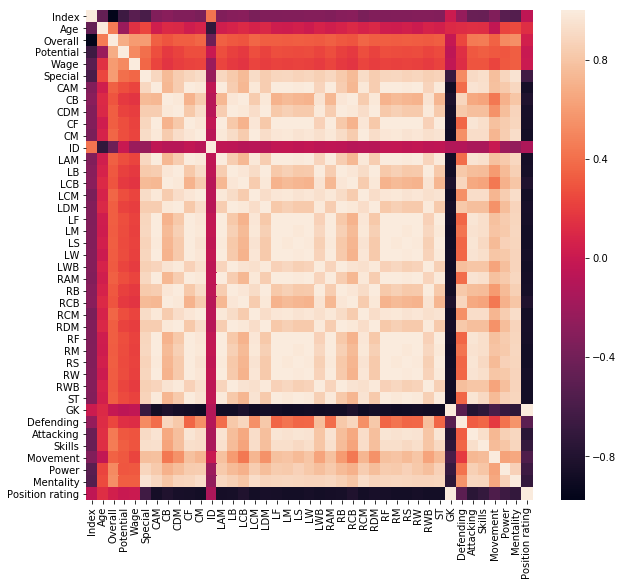

In [0]:
plt.figure(figsize=(10,9))
sns.heatmap(data.corr())

#PRUNING

In [0]:
FIFA = data[['Age', 'Overall', 'Potential', 'Special', 'GK', 'Defending', 'Attacking', 'Skills', 'Movement', 'Power', 'Mentality', 'Position rating']]


#HEATMAP  FOR CORRELATION

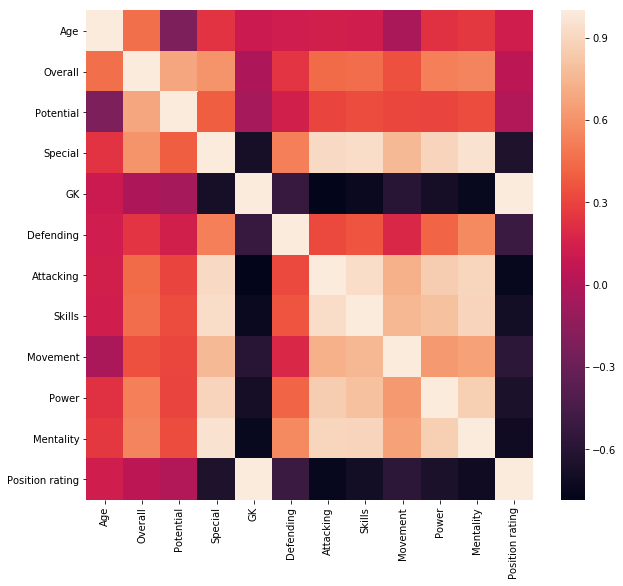

In [0]:
plt.figure(figsize=(10,9))
sns.heatmap(FIFA.corr())

#TRAIN_TEST-SPLIT

In [0]:
x=FIFA.drop(['Overall'],axis=1)
y=FIFA['Overall']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,random_state=10)

#IMPLEMENTING LINEAR REGRESSION

In [0]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train.values,y_train.values)
print(lr.intercept_)
print(lr.coef_)

-16.23311297866674
[ 0.59169894  0.61250454 -0.06107641  0.01309047  0.07733959  0.08770513
  0.05481161  0.07325998  0.08029755  0.05931138  0.08728581]


#RMSE VALUES OF MODEL

In [0]:
from sklearn.metrics import mean_squared_error
import math
train_pred_y=lr.predict(x_train)
test_pred_y=lr.predict(x_test)
print("RMSE Train:",math.sqrt(mean_squared_error(y_train,train_pred_y)))
print("RMSE Test:",math.sqrt(mean_squared_error(y_test,test_pred_y)))
#lr.score(train input  and train o/p or test)


RMSE Train: 2.070437006769251
RMSE Test: 2.095749874426896


#ERROR HISTOGRAM

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   3.,   1.,
          3.,   4.,  12.,  11.,  21.,  24.,  33.,  38.,  43.,  65.,  69.,
         86., 134., 141., 164., 181., 213., 264., 301., 299., 338., 364.,
        380., 390., 360., 317., 285., 229., 166., 143., 111.,  66.,  49.,
         35.,  17.,  11.,   9.,   7.,   4.]),
 array([-11.02924628, -10.68780266, -10.34635905, -10.00491543,
         -9.66347182,  -9.3220282 ,  -8.98058459,  -8.63914097,
         -8.29769736,  -7.95625374,  -7.61481013,  -7.27336651,
         -6.9319229 ,  -6.59047928,  -6.24903567,  -5.90759206,
         -5.56614844,  -5.22470483,  -4.88326121,  -4.5418176 ,
         -4.20037398,  -3.85893037,  -3.51748675,  -3.17604314,
         -2.83459952,  -2.49315591,  -2.15171229,  -1.81026868,
         -1.46882506,  -1.12738145,  -0.78593783,  -0.44449422,
         -0.1030506 ,   0.23839301,   0.57983663,   0.92128024,
          1.26272386,   1.60416747,   1.94561108,   2.2870547 ,
          2.628498

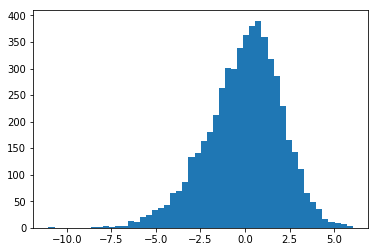

In [0]:
plt.hist(y_test-test_pred_y,bins=50)

#IMPLEMENTING DECISION TREE REGRESSION

In [0]:
from sklearn.tree import DecisionTreeRegressor  
DTregressor = DecisionTreeRegressor(random_state = 0)  
DTregressor.fit(x_train.values,y_train.values) 


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [0]:
train_pred_y=DTregressor.predict(x_train)
test_pred_y=DTregressor.predict(x_test)
print("RMSE Train:",math.sqrt(mean_squared_error(y_train,train_pred_y)))
print("RMSE Test:",math.sqrt(mean_squared_error(y_test,test_pred_y)))

RMSE Train: 0.0
RMSE Test: 1.1224394194038696


#RANDOM FOREST REGRESSOR

In [0]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(random_state = 0)
RFregressor.fit(x_train.values,y_train.values) 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

#RMSE VALUES OF MODEL

In [0]:
train_pred_y=RFregressor.predict(x_train)
test_pred_y=RFregressor.predict(x_test)
print("RMSE Train:",math.sqrt(mean_squared_error(y_train,train_pred_y)))
print("RMSE Test:",math.sqrt(mean_squared_error(y_test,test_pred_y)))

RMSE Train: 0.36401367969084036
RMSE Test: 0.8644797864639863
